<a href="https://colab.research.google.com/github/unknown-jun/First_step_of_data_analist/blob/master/K_Beauty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


**1. K-Beauty는 성장하고 있을까? 해외 직접 판매를 한다면 어느 국가로 판매전략을 세우면 좋을까?**


*   e : 추정치
*   p : 잠정치
*   -: 자료없음
*  ... : 미상자료
*  x : 비밀보호 추가

#**2. 필요 라이브러리가져오기**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




%matplotlib inline

In [3]:
from google.colab import files
uploaded=files.upload()

Saving 국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20201020191448.csv to 국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20201020191448 (3).csv


In [4]:
# 시각화를 위한 폰트 설정
import os

if os.name == 'posix':
  sns.set(font='AppleGothic')
elif os.name == 'nt':
  sns.set(font='Malgun Gothic')

%config InlineBackened.figure_format ='retina'


import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 





#**3. 데이터로드하기**



In [5]:
df_raw = pd.read_csv('국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20201020191448.csv',
                     encoding="cp949")
df_raw

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4,2016 2/4,2016 3/4,2016 4/4,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4 p)
0,합계,합계,계,148272,153641,163999,213216,269101,271784,268421,450568,511395,494391,560853,726741,768504,574551,749612,858240,833672,897205,921586,974060,1250236,1344404,1525396,1879499,1525487,1273753
1,합계,합계,면세점,-,-,-,-,-,-,-,-,-,-,-,-,610257,441096,610630,677884,665613,725319,761836,770656,1070693,1157158,1336372,1655635,1297490,1051987
2,합계,합계,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,158247,133455,138982,180356,168059,171886,159750,203404,179543,187246,189024,223864,227997,221766
3,합계,컴퓨터 및 주변기기,계,4915,4052,3912,3529,2903,2697,3804,4048,4211,3693,3160,3270,2610,2043,2018,2158,5236,3854,4320,4511,3702,4038,3670,3826,4142,3776
4,합계,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,-,-,-,-,-,5,3,5,1,2,6,1,215,2,0,1,70,113,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,기타,생활용품 및 자동차용품,면세점,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,0,0,0,0,0,0,0,0,0,0
446,기타,생활용품 및 자동차용품,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,656,596,567,634,665,469,504,589,465,488,308,531,384,334
447,기타,기 타,계,765,735,849,804,788,805,724,838,852,588,589,714,883,746,814,1101,1067,1063,1120,770,711,689,469,1094,939,710
448,기타,기 타,면세점,-,-,-,-,-,-,-,-,-,-,-,-,2,0,82,266,272,316,404,0,0,1,0,1,0,0


In [6]:
df_raw.shape

(450, 29)

In [7]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw['국가(대륙)별'].value_counts()

중동            45
아세안(ASEAN)    45
기타            45
일본            45
EU            45
미국            45
합계            45
중국            45
대양주           45
중남미           45
Name: 국가(대륙)별, dtype: int64

In [8]:
  # 미국 데이터만 따로 보기
  # df_raw['국가(대륙)별'] == "미국"로 치면 boolin로 나타나고
  # 한번 더 df_raw[df_raw['국가(대륙)별'] == "미국"] 처럼 df 감싸주면 
  # 데이터 프레임 형태로 나옴
  
  df_raw[df_raw['국가(대륙)별'] == "미국"]

,국가(대륙)별,상품군별,판매유형별,2014 1/4,2014 2/4,2014 3/4,2014 4/4,2015 1/4,2015 2/4,2015 3/4,2015 4/4,2016 1/4,2016 2/4,2016 3/4,2016 4/4,2017 1/4,2017 2/4,2017 3/4,2017 4/4,2018 1/4,2018 2/4,2018 3/4,2018 4/4,2019 1/4,2019 2/4,2019 3/4,2019 4/4,2020 1/4,2020 2/4 p)
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,37392,38179,36831,35290,44421,45169,40976,41927,53209,42679,40207,37631,48978,40918,44861,55386,53848,48277,63218
46,미국,합계,면세점,-,-,-,-,-,-,-,-,-,-,-,-,8160,9183,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481,698,339
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,37009,31793,32458,41032,37495,36604,35314,46899,38261,41910,53568,52367,47579,62879
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,2362,2533,2121,1704,1531,1054,946,791,854,2033,1553,1784,1774,1298,1408,1653,1382,1182,1594
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,-,-,-,-,-,0,0,0,0,0,0,0,1,0,0,0,0,0,0
50,미국,컴퓨터 및 주변기기,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,1054,946,791,854,2033,1553,1784,1773,1298,1408,1653,1382,1182,1594
51,미국,가전·전자·통신기기,계,2875,2758,2894,3527,4397,3589,2982,3286,3571,2921,2744,3354,2730,2425,2575,2394,1737,1716,1723,1886,1845,1837,3166,1785,1830,2759
52,미국,가전·전자·통신기기,면세점,-,-,-,-,-,-,-,-,-,-,-,-,18,23,29,32,65,38,72,52,66,116,107,49,12,2
53,미국,가전·전자·통신기기,면세점 이외,-,-,-,-,-,-,-,-,-,-,-,-,2712,2402,2546,2362,1672,1678,1651,1834,1779,1721,3059,1736,1818,2757
54,미국,소프트웨어,계,47,57,49,128,182,113,163,116,147,103,82,83,67,45,37,125,175,251,172,269,88,156,118,338,135,182


#**4. 분석과 시각화를 위한 tidy data 만들기**


In [9]:
df=df_raw.melt(id_vars=["국가(대륙)별","상품군별", "판매유형별"], 
            var_name="기간", value_name="판매액 (백만원)")
df.shape

(11700, 5)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11700 entries, 0 to 11699
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   국가(대륙)별    11700 non-null  object
 1   상품군별       11700 non-null  object
 2   판매유형별      11700 non-null  object
 3   기간         11700 non-null  object
 4   판매액 (백만원)  11700 non-null  object
dtypes: object(5)
memory usage: 457.2+ KB


In [11]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매액 (백만원)
0,합계,합계,계,2014 1/4,148272
1,합계,합계,면세점,2014 1/4,-
2,합계,합계,면세점 이외,2014 1/4,-
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-


# **5. 데이터 전처리**

##**5.1 기간에서 연도를 분리**

In [12]:
# '2020 2/4 p)'.split()[0]의 값인 '2020'은 str 타입이다.
# 이는 ''로 인한 것이기에 데이터 처리를 용이하기 위해서
# int 타입으로 변경

int('2020 2/4 p)'.split()[0])

2020

In [13]:
# 연도 column을 만들고 그 value 값으로
# 기간에 있는 연도만을 추출
# 이를 위해서 lambda 함수로 공백을 indexing 한 후에
# [0]만을 추출 후 이를 int타입으로 바꿔줌

df["연도"] = df["기간"].map(lambda x : int(x.split()[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매액 (백만원),연도
0,합계,합계,계,2014 1/4,148272,2014
1,합계,합계,면세점,2014 1/4,-,2014
2,합계,합계,면세점 이외,2014 1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014


In [14]:
'2020 2/4 p)'.split()[1].split('/')[0]

'2'

In [15]:
# 기간에서 분기를 분리
df['분기']=df["기간"].map(lambda x: int(x.split()[1].split('/')[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매액 (백만원),연도,분기
0,합계,합계,계,2014 1/4,148272,2014,1
1,합계,합계,면세점,2014 1/4,-,2014,1
2,합계,합계,면세점 이외,2014 1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,-,2014,1


##**5.2 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기**

In [16]:
# - 문자로 결측치를 변경하고 float 타입으로 변경하기
df["판매액 (백만원)"] = df["판매액 (백만원)"].replace("-", np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매액 (백만원),연도,분기
0,합계,합계,계,2014 1/4,148272.0,2014,1
1,합계,합계,면세점,2014 1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014 1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014 1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014 1/4,NaN,2014,1


#**5.3 필요없는 데이터 제거하기**

In [17]:
# 결측치보기
df.isnull().sum()

국가(대륙)별         0
상품군별            0
판매유형별           0
기간              0
판매액 (백만원)    3600
연도              0
분기              0
dtype: int64

In [18]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거
df = df[(df["국가(대륙)별"] !=  "합계") & (df["상품군별"] != "합계")].copy()

In [19]:
# info로 정보 보기
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9828 entries, 48 to 11699
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   국가(대륙)별    9828 non-null   object 
 1   상품군별       9828 non-null   object 
 2   판매유형별      9828 non-null   object 
 3   기간         9828 non-null   object 
 4   판매액 (백만원)  6804 non-null   float64
 5   연도         9828 non-null   int64  
 6   분기         9828 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 614.2+ KB


#**6. K-Beauty 시각화**


## **6.1 전체 상품군 판매액**

In [20]:
# 판매유형별 데이터는 일부 기간에는 "계"만 존재하기 때문에
# 판매유형별 == "계" 데이터만 가져와서 봐야지만 
# 평균값을 구하는 그래프를 올바른 값으로 표시 가능
df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매액 (백만원),연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1


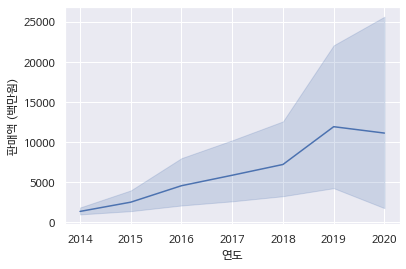

In [21]:
# 연도 , 판매액 lineplot으로 그리기
sns.lineplot(data=df_total, x = '연도', y = '판매액 (백만원)')

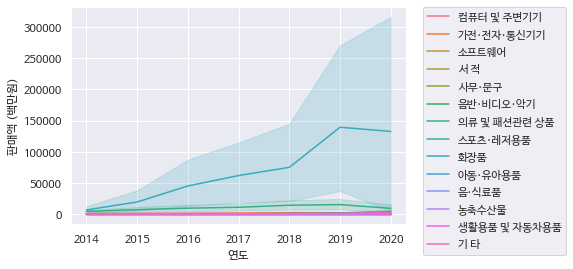

In [22]:
# 연도, 금액(million) 판매액 lineplot으로 그리고 상품군별로 다른 색상으로 표시
sns.lineplot(data=df_total , x="연도", y="판매액 (백만원)", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

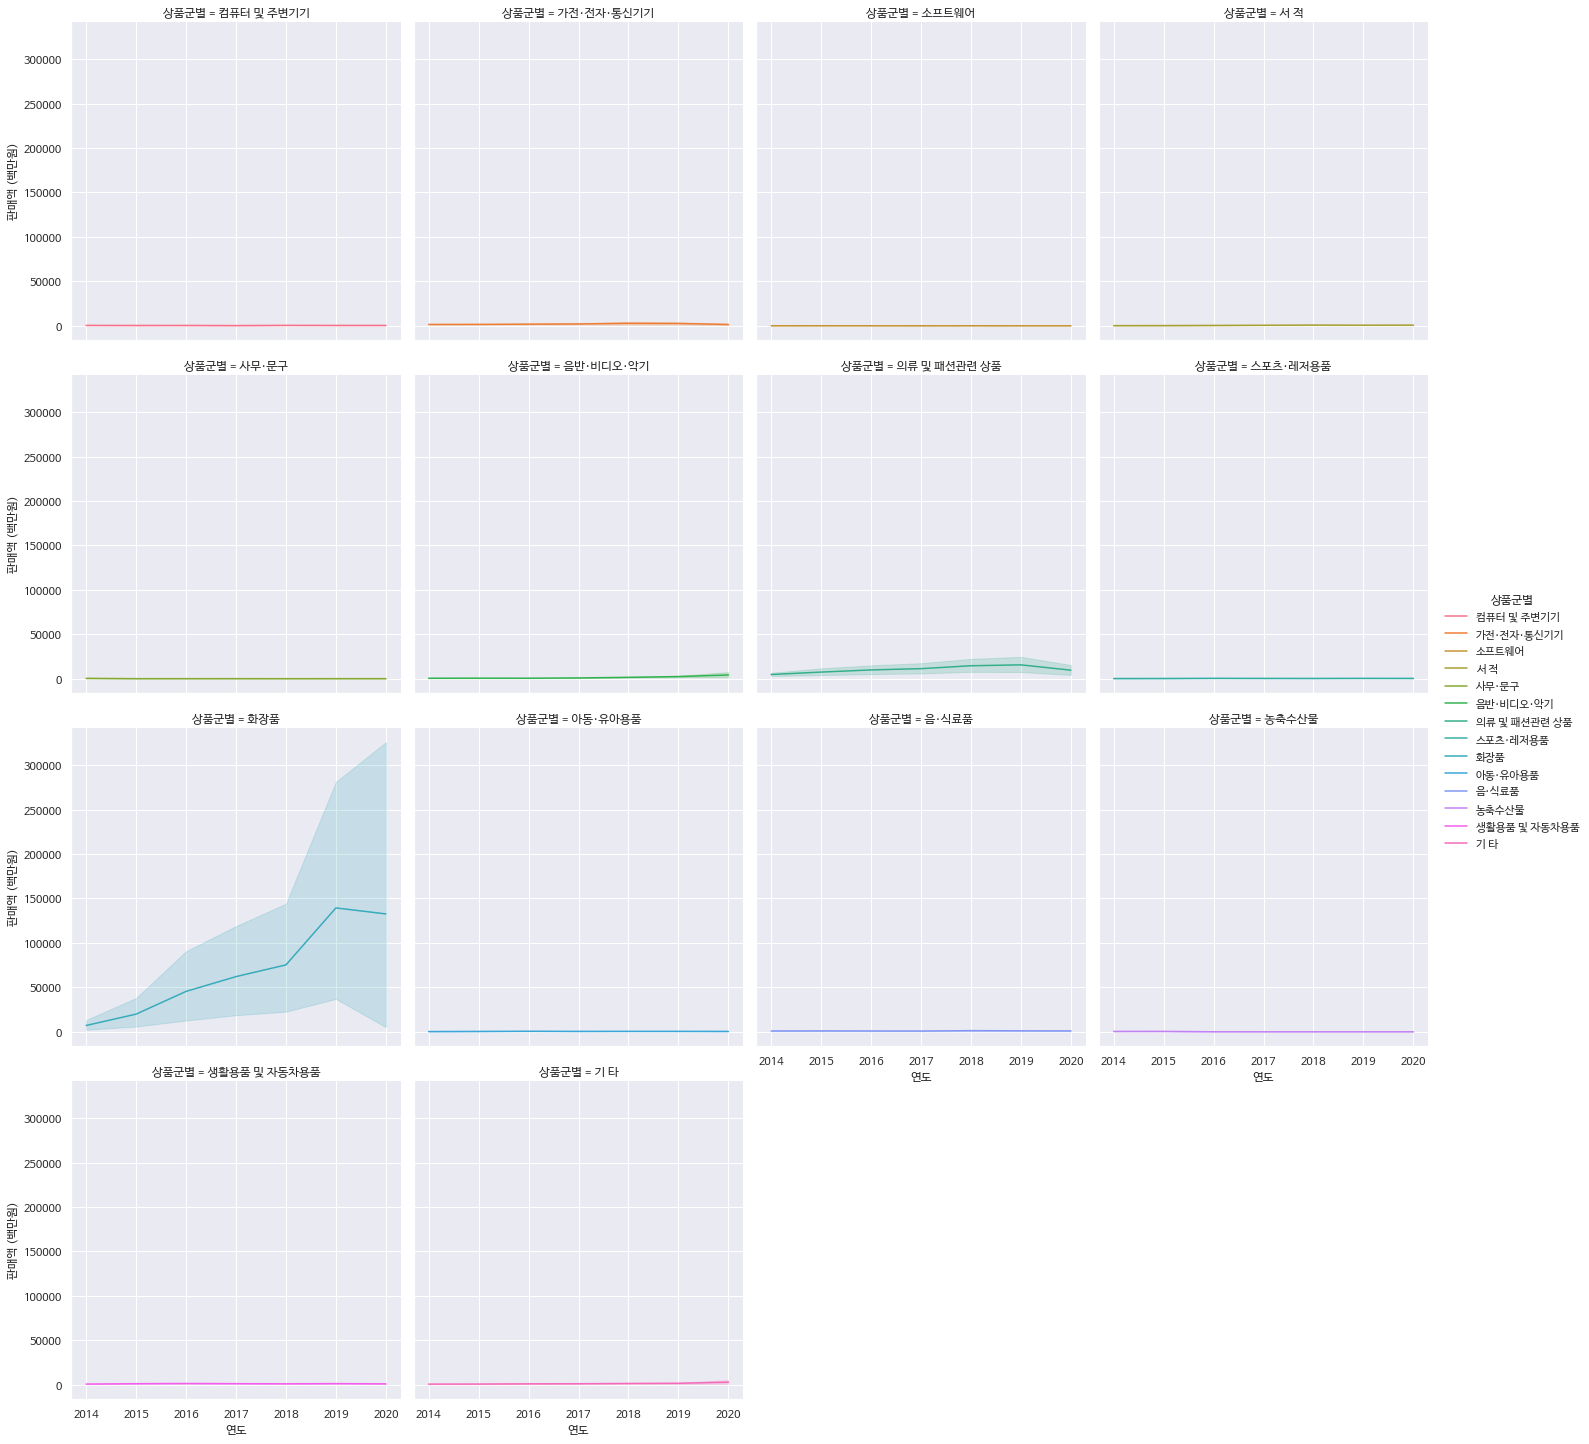

In [23]:
# 위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시
sns.relplot(data=df_total, x="연도", y="판매액 (백만원)", 
            hue="상품군별", kind="line", col="상품군별", col_wrap=4)

In [24]:
# isin을 사용해 화장품만 제외를 하고 df_sub 이라는 변수에 담음

df_sub = df_total[~df_total["상품군별"].isin(['화장품'])].copy()
df_sub

,국가(대륙)별,상품군별,판매유형별,기간,판매액 (백만원),연도,분기
48,미국,컴퓨터 및 주변기기,계,2014 1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014 1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014 1/4,47.0,2014,1
57,미국,서 적,계,2014 1/4,962.0,2014,1
60,미국,사무·문구,계,2014 1/4,25.0,2014,1
...,...,...,...,...,...,...,...
11685,기타,아동·유아용품,계,2020 2/4 p),285.0,2020,2
11688,기타,음·식료품,계,2020 2/4 p),122.0,2020,2
11691,기타,농축수산물,계,2020 2/4 p),3.0,2020,2
11694,기타,생활용품 및 자동차용품,계,2020 2/4 p),334.0,2020,2


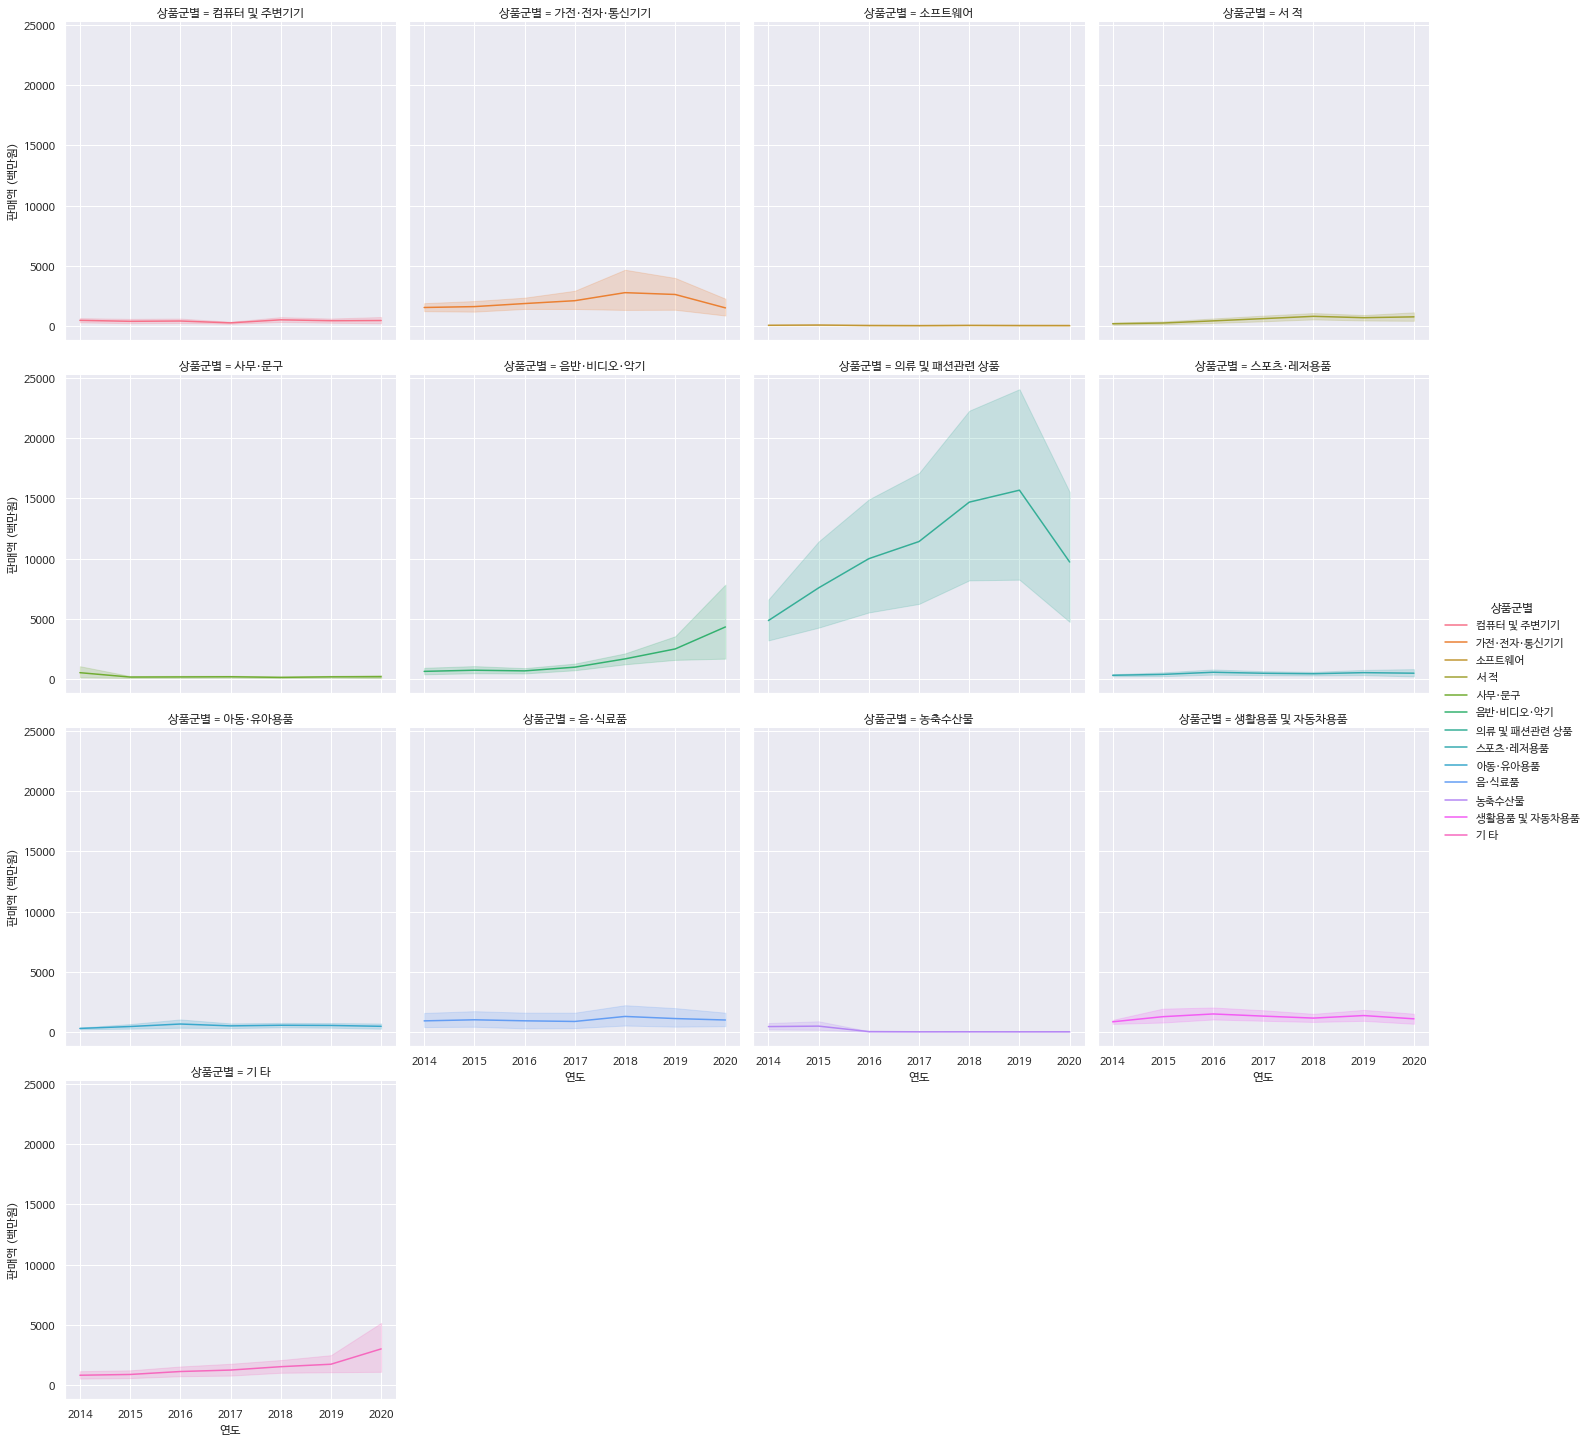

In [25]:
# 연도별 판매액을 상품별로 replot을 활용해 서브플롯으로 그려보기
sns.relplot(data = df_sub, x = "연도", y="판매액 (백만원)", hue="상품군별", 
                           col="상품군별", col_wrap=4, kind='line')

##**6.2 화장품의 온라인쇼핑 해외직접판매액**

In [26]:
# df_cosmetic 이라는 변수에 상품군별이 화장품인 데이터만 가져오기

df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic['상품군별'].unique()

array(['화장품'], dtype=object)

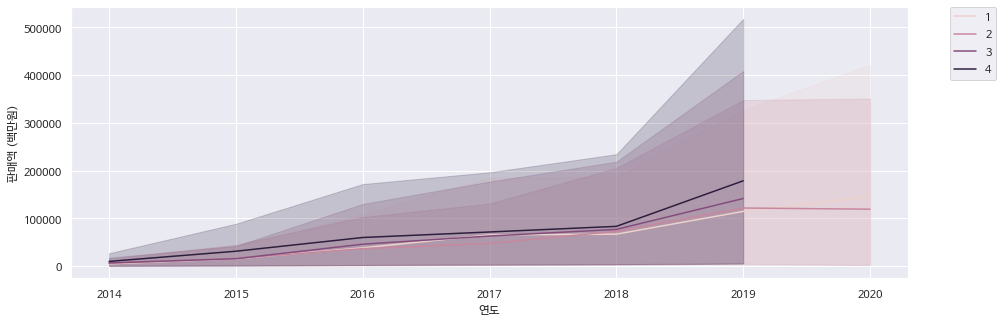

In [27]:
# 연도와 판매액을 lineplot으로 그리고 분기별로 다른 색상으로 변경

plt.figure(figsize=(15, 5))
sns.lineplot(data=df_cosmetic, x="연도", y="판매액 (백만원)", hue = "분기")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

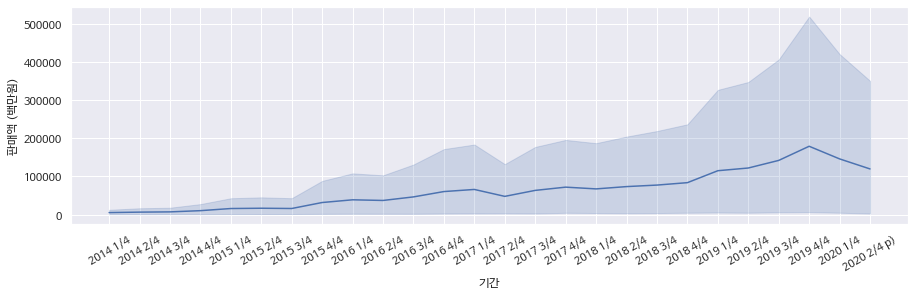

In [28]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하기

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y= "판매액 (백만원)")

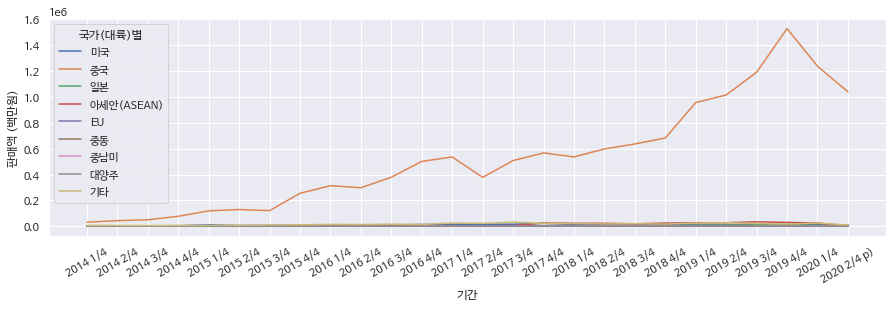

In [29]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "국가(대륙)별"로 다른 색상으로 표시하기

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic, x="기간", y= "판매액 (백만원)", hue="국가(대륙)별")

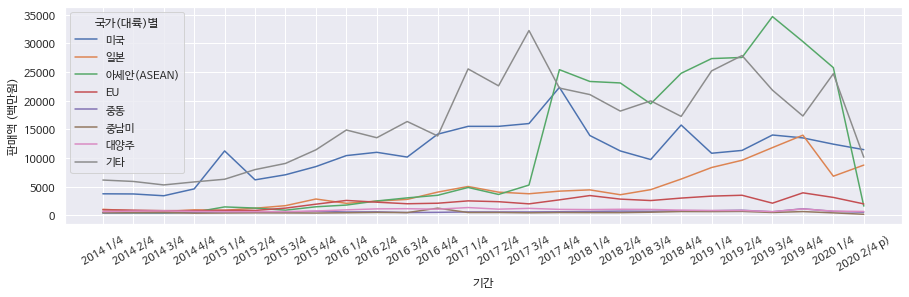

In [30]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "국가(대륙)별"로 다른 색상으로 표시하기 - 중국을 뺀 국가들

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], 
                          x="기간", y= "판매액 (백만원)", hue="국가(대륙)별")

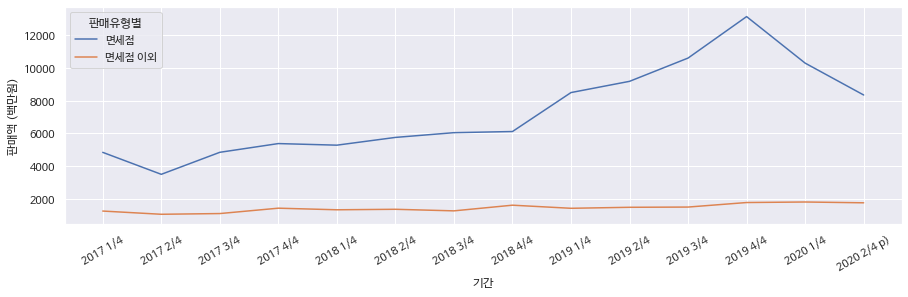

In [31]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "국가(대륙)별"로 다른 색상으로 표시하기

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
df_sub = df[df["판매유형별"] != "계"].copy()
sns.lineplot(data = df_sub, x="기간", y= "판매액 (백만원)", hue="판매유형별", ci=None)

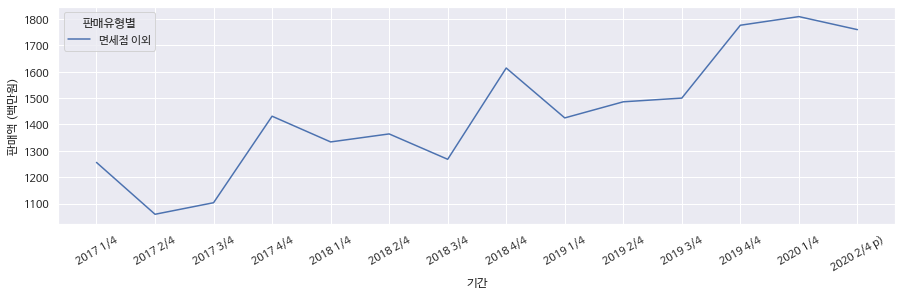

In [32]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "국가(대륙)별"로 다른 색상으로 표시하기 - 면세점 이외만

plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()
sns.lineplot(data = df_sub, x="기간", y= "판매액 (백만원)", hue="판매유형별", ci=None)

##**6.3 의류 및 패션관련 상품 온라인쇼핑 해외직접판매액**

In [33]:
#df_fashion 이라는 변수에 의해 의류 데이터만 가져와 따로 담아주기
df_fashion = df[(df['상품군별'] =="의류 및 패션관련 상품") & (df['판매유형별']=='계')].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,판매액 (백만원),연도,분기
66,미국,의류 및 패션관련 상품,계,2014 1/4,9810.0,2014,1
111,중국,의류 및 패션관련 상품,계,2014 1/4,12206.0,2014,1
156,일본,의류 및 패션관련 상품,계,2014 1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션관련 상품,계,2014 1/4,3473.0,2014,1
246,EU,의류 및 패션관련 상품,계,2014 1/4,1364.0,2014,1


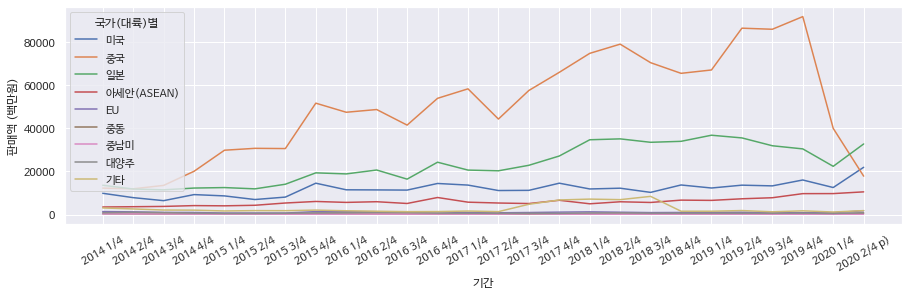

In [34]:
# "의류 및 패션관련 상품" 판매액에 대한 기간별 금액 데이터 시각화하고
# "국가(대륙)별"로 다른 색상으로 표시하기
plt.figure(figsize=(15, 4))
plt.xticks(rotation = 30)
sns.lineplot(data=df_fashion, x='기간', y='판매액 (백만원)', hue="국가(대륙)별")

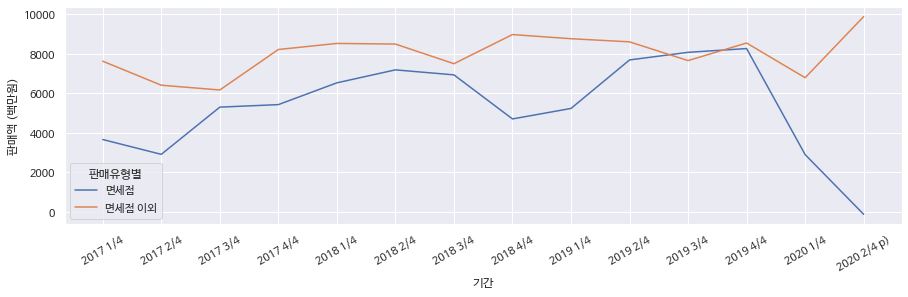

In [35]:
# "의류 및 패션관련 상품" 판매액에 대한 기간별 금액 데이터 시각화하고
# "판매유형별"로 다른 색상으로 표시하기

df_fashion2 = df[(df['상품군별'] =="의류 및 패션관련 상품") & (df['판매유형별']!='계')].copy()

plt.figure(figsize=(15, 4))
plt.xticks(rotation = 30)
sns.lineplot(data=df_fashion2, x='기간', y='판매액 (백만원)', hue="판매유형별", ci=None)

##**6.4 데이터 집계하기**

In [36]:
# 패션 데이터가 합계로만 이루어져 있는 지 확인
df_fashion["판매유형별"].value_counts()

계    234
Name: 판매유형별, dtype: int64

In [37]:
# 피벗데이블로 "국가(대륙)별", "연도별" 합계 금액을 표 형태로 구하기
result = df_fashion.pivot_table(index="국가(대륙)별", columns="연도", values="판매액 (백만원)", aggfunc="sum")
result

연도,2014,2015,2016,2017,2018,2019,2020
국가(대륙)별,,,,,,,
EU,4485.0,3374.0,4899.0,3736.0,4114.0,3694.0,2569.0
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6309.0,2963.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2387.0,1313.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55035.0,34316.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31217.0,20147.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134243.0,54912.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330254.0,57584.0
중남미,975.0,616.0,649.0,762.0,576.0,543.0,220.0
중동,1172.0,1018.0,968.0,772.0,879.0,924.0,797.0


##**6.5 연산결과를 시각적으로 보기**

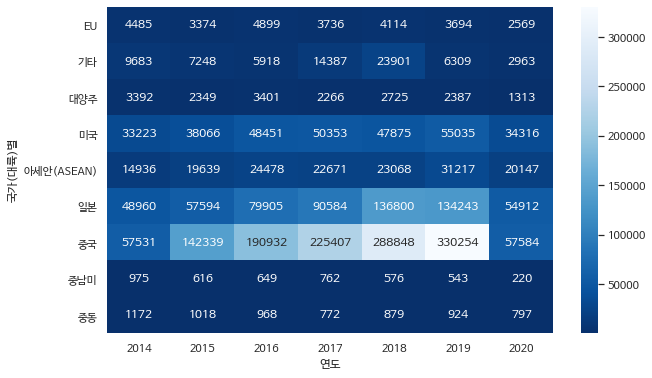

In [38]:
# 피벗테이블로 구한 결과를 값의 많고 적음에 따라 시각적으로 표현하기

plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap="Blues_r", annot = True, fmt= ".0f")

#**7. 전체 상품군별로 온라인쇼핑 해외직접판매액은 증가했을까?**

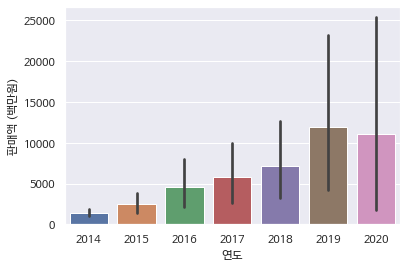

In [39]:
# 위에서 판매유형별 데이터의 "계"만 모은 df_total 변수를 통한 연도별 합계 금액을 시각화 하기

sns.barplot(data=df_total, x="연도", y="판매액 (백만원)")

In [40]:
# 위에서 구한 데이터에는 2014~2016년 데이터는 합계만 있기 때문에
# 합계 데이터만 다시 가져와서 그리기

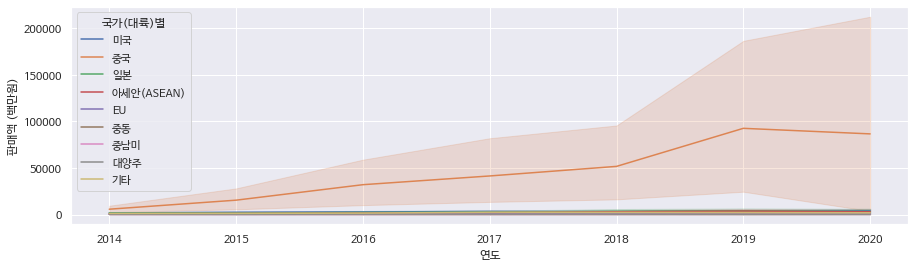

In [41]:
# 연도별 판매액을 그리고 "국가(대륙)별"로 다른 색상으로 표현하기

plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x= "연도", y="판매액 (백만원)", hue="국가(대륙)별")

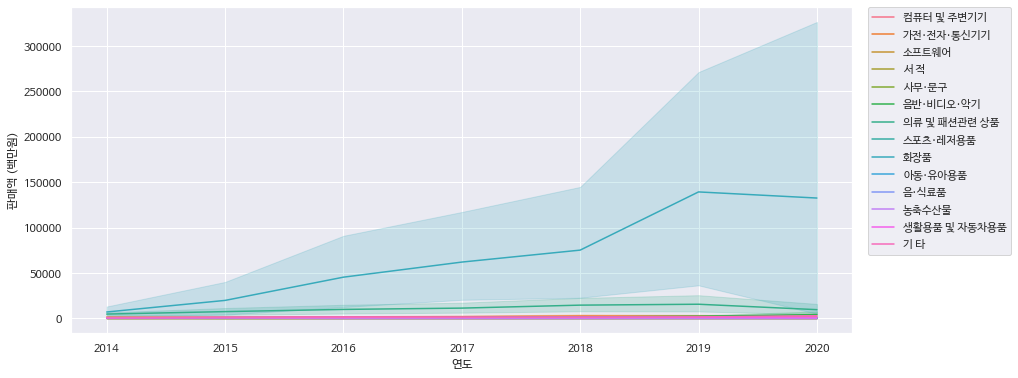

In [46]:
# 연도별 판매액을 그리고 "상품군별"로 다른 색상으로 표현하기


plt.figure(figsize=(14, 6))
sns.lineplot(data=df_total, x= "연도", y="판매액 (백만원)", hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0,)


**결론: 화장품 산업은 2019년 엄청난 성장세를 이뤘지만 중국의 코로나의 여파로 인하여 지금은 그 성장세가 많이 둔감된 상태다.**

**가장 크게 피해금액이 많은 곳은 중국이지만 그럼에도 불구하고 아직도 엄청난 수출세를 띄고 있다는 점이 특징이다**

**그렇기에 포스트 코로나 시대를 대비하면서 때를 기다려야 할 것이다**